In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import numpy as np

import prepare
import env

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

codeup: get_blog_articles(article_list)
inshort: scrape_one_page(topic)
inshort: get_news_articles()includes:business sports technology entertainment


In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/spam_db'

sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

Exercises

Do your work for this exercise in a file named explore.

    Spam Data
        Load the spam data set.
        Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
        Is there any overlap in the bigrams for the spam data and the ham data?
        Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

    Explore the blog articles using the techniques discussed in the exploration lesson.

    Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.


In [4]:
str(list([1, 2, 3, 4]))

'[1, 2, 3, 4]'

# 1b
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [5]:
df['clean'] = df.text.apply(prepare.basic_clean).apply(prepare.tokenize).apply(prepare.remove_stopwords).apply(prepare.lemmatize)
df.head()

,label,text,clean
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think go usf life around though


In [6]:
df.groupby('label').count()

,text,clean
label,,
ham,4825,4825
spam,747,747


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
#pd.crosstab(l.index, l, normalize = True)

In [9]:
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [10]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [11]:
ham_words = ' '.join(df.clean[df.label == 'ham'])
ham_words

"go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah ' think go usf life around though even brother like speak treat like aid patent per request ' melle melle oru minnaminunginte nurungu vettam ' set callertune caller press 9 copy friend callertune ' gonna home soon ' want talk stuff anymore tonight k ' cried enough today ' searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh ki ' watching eh u remember 2 spell name yes v naughty make v wet fine thataos way u feel thataos way gota b seriously spell name ium going try 2 month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice ' really hungry tho suck mark getting worried know ' sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom ' left 

In [12]:
spam_words = ' '.join(df.clean[df.label == 'spam'])
all_words = ' '.join(df.clean)

# From curriculum     
ham_words = clean(' '.join(df[df.label == 'ham'].text)) \
spam_words = clean(' '.join(df[df.label == 'spam'].text)) \
all_words = clean(' '.join(df.text))
#### above

#### below
ham_freq = pd.Series(ham_words).value_counts() \
spam_freq = pd.Series(spam_words).value_counts() \
all_freq = pd.Series(all_words).value_counts() \

spam_freq.head()

In [13]:
ham = ham_words.split()

In [14]:
ham_freq = pd.Series(ham).value_counts()
ham_freq

'           1744
u           1054
get          314
2            305
ltgt         276
            ... 
pressure       1
cage           1
pace           1
sink           1
bitching       1
Length: 6929, dtype: int64

In [15]:
spam = spam_words.split()
alls = all_words.split()

In [16]:
spam_freq = pd.Series(spam).value_counts()
all_freq = pd.Series(alls).value_counts()

In [17]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['alls', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0))

In [18]:
word_counts.head()

,alls,ham,spam
',1871,1744.0,127.0
0,3,0.0,3.0
008704050406,2,0.0,2.0
0089my,1,0.0,1.0
0121,1,0.0,1.0


In [19]:
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8848 entries, ' to zyada
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   alls    8848 non-null   int64  
 1   ham     8848 non-null   float64
 2   spam    8848 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 276.5+ KB


In [20]:
word_counts.sort_values(by='alls', ascending=False).head(10)

,alls,ham,spam
',1871,1744.0,127.0
u,1214,1054.0,160.0
call,600,241.0,359.0
2,478,305.0,173.0
get,397,314.0,83.0
ur,384,240.0,144.0
go,304,273.0,31.0
4,288,169.0,119.0
ok,277,272.0,5.0
ltgt,276,276.0,0.0


In [21]:
word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6)

,alls,ham,spam
ask,88,88.0,0.0
say,118,118.0,0.0
da,132,132.0,0.0
later,134,134.0,0.0
lor,160,160.0,0.0
ltgt,276,276.0,0.0


In [22]:
word_counts['perc_ham'] = (word_counts.ham)/(word_counts.alls)

In [23]:
word_counts.sort_values(by='alls', ascending=False).head(10)

,alls,ham,spam,perc_ham
',1871,1744.0,127.0,0.932122
u,1214,1054.0,160.0,0.868204
call,600,241.0,359.0,0.401667
2,478,305.0,173.0,0.638075
get,397,314.0,83.0,0.790932
ur,384,240.0,144.0,0.625000
go,304,273.0,31.0,0.898026
4,288,169.0,119.0,0.586806
ok,277,272.0,5.0,0.981949
ltgt,276,276.0,0.0,1.000000


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

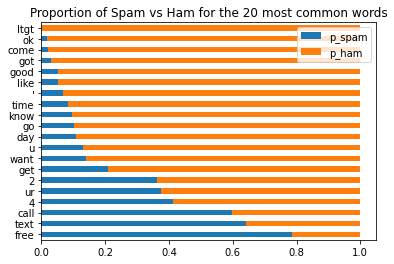

In [24]:
# I DIDN'T WRITE THIS. GOT THIS CELL FROM CURRICULUM 
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['alls'],
         p_ham=word_counts.ham / word_counts['alls'])
 .sort_values(by='alls')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


# Word cloud 

In [25]:
spam

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetc',
 "'",
 'apply',
 '08452810075over18',
 "'",
 'freemsg',
 'hey',
 'darling',
 "'",
 '3',
 'week',
 "'",
 'word',
 'back',
 "'",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'a900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'we

# Ham WordCloud

(-0.5, 399.5, 199.5, -0.5)

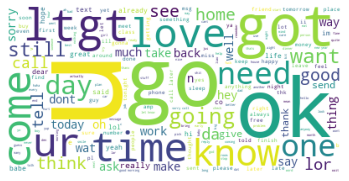

In [26]:
img = WordCloud(background_color='white').generate(ham_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')


# Spam WordCloud

(-0.5, 399.5, 199.5, -0.5)

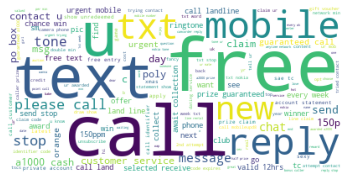

In [27]:
img = WordCloud(background_color='white').generate(spam_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')


# All WordCloud

(-0.5, 399.5, 199.5, -0.5)

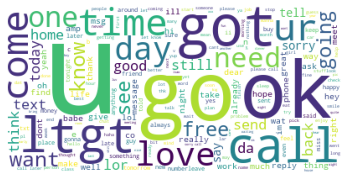

In [28]:
img = WordCloud(background_color='white').generate(all_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')


In [29]:
# If I have time, I can go back and add 'u' to the remove-stopwords list 
#to get more distinct results

# Bigrams

In [30]:
# test out one

In [31]:
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 "'",
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'",
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 "'",
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 "'",
 'gonna',
 'home',
 'soon',
 "'",
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 "'",
 'cried',
 'enough',
 'today',
 "'",
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'ki',
 "'",
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spe

In [32]:
bi_ham = nltk.ngrams(ham, 2)
bi_ham

In [33]:
m = list(bi_ham)

In [34]:
m

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', "'"),
 ("'", 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', "'"),
 ("'", 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte

In [35]:
pd.Series(m).value_counts()

(sorry, ')       52
(call, later)    52
(', ')           50
(', call)        45
(let, know)      41
                 ..
(look, mp3)       1
(lim, look)       1
(sim, lim)        1
(went, sim)       1
(true, name)      1
Length: 30844, dtype: int64

# It works

# Make a function

In [36]:
def grams(hams, spams, allz, n):
    n_hamz = nltk.ngrams(hams, n)
    n_spamz = nltk.ngrams(spams, n)
    n_allz = nltk.ngrams(allz, n)
    
    n_hamy = list(n_hamz)
    n_spamy = list(n_spamz)
    n_ally = list(n_allz)
    
    n_ham = pd.Series(n_hamy)
    n_spam = pd.Series(n_spamy)
    n_alls = pd.Series(n_ally)
    
    return n_ham, n_spam, n_alls

In [37]:
nham, nspam, nalls = grams(ham, spam, alls, 2)

# Graph results!

# Ham Bi

In [38]:
top_15_ham_bi = nham.value_counts().head(15)

Text(0.5, 1.0, 'top_15_ham_bi')

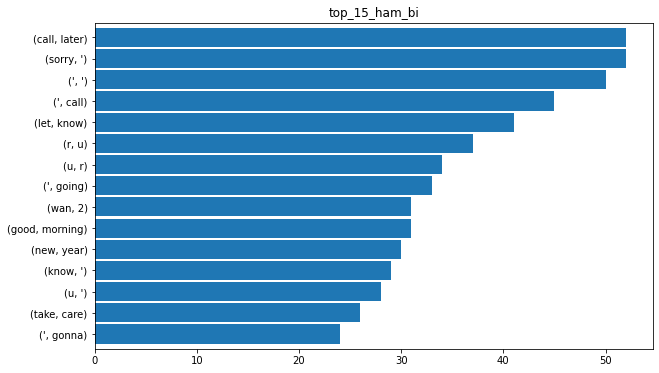

In [39]:
top_15_ham_bi.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_ham_bi')

# Spam Bi

In [40]:
top_15_spam_bi = nspam.value_counts().head(15)

Text(0.5, 1.0, 'top_15_spam_bi')

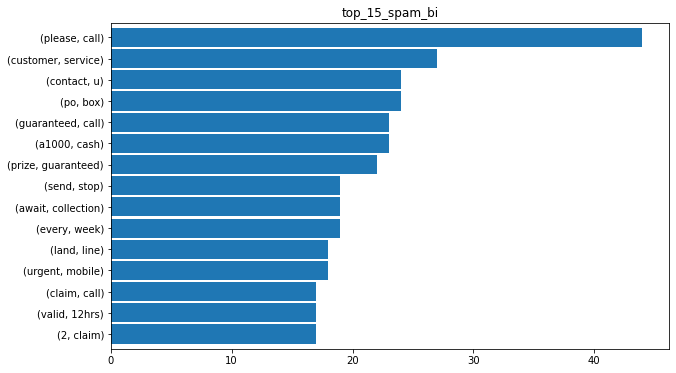

In [41]:
top_15_spam_bi.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_spam_bi')

# Alls Bi

In [42]:
top_15_nalls_bi = nalls.value_counts().head(15)

Text(0.5, 1.0, 'top_15_alls_bi')

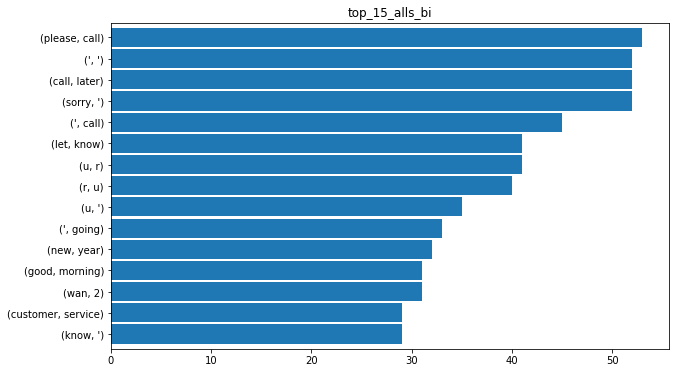

In [43]:
top_15_nalls_bi.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_alls_bi')

# Wordle

In [44]:
#   nham, nspam, nalls = grams(ham, spam, alls, 2)

In [45]:
nham

0              (go, jurong)
1           (jurong, point)
2            (point, crazy)
3        (crazy, available)
4        (available, bugis)
                ...        
40165             (gave, u)
40166             (u, free)
40167          (free, rofl)
40168          (rofl, true)
40169          (true, name)
Length: 40170, dtype: object

img = WordCloud(background_color='white', width=800, height=400).generate(nham)

ERROR: TypeError: expected string or bytes-like object


In [46]:
top_15_ham_bi = nham.value_counts().head(15)
top_15_ham_bi

(sorry, ')         52
(call, later)      52
(', ')             50
(', call)          45
(let, know)        41
(r, u)             37
(u, r)             34
(', going)         33
(good, morning)    31
(wan, 2)           31
(new, year)        30
(know, ')          29
(u, ')             28
(take, care)       26
(', gonna)         24
dtype: int64

In [47]:
top_15_ham_bi_dict = top_15_ham_bi.to_dict()
top_15_ham_bi_dict

{('sorry', "'"): 52,
 ('call', 'later'): 52,
 ("'", "'"): 50,
 ("'", 'call'): 45,
 ('let', 'know'): 41,
 ('r', 'u'): 37,
 ('u', 'r'): 34,
 ("'", 'going'): 33,
 ('good', 'morning'): 31,
 ('wan', '2'): 31,
 ('new', 'year'): 30,
 ('know', "'"): 29,
 ('u', "'"): 28,
 ('take', 'care'): 26,
 ("'", 'gonna'): 24}

In [48]:
top_15_ham_bi_dict

{('sorry', "'"): 52,
 ('call', 'later'): 52,
 ("'", "'"): 50,
 ("'", 'call'): 45,
 ('let', 'know'): 41,
 ('r', 'u'): 37,
 ('u', 'r'): 34,
 ("'", 'going'): 33,
 ('good', 'morning'): 31,
 ('wan', '2'): 31,
 ('new', 'year'): 30,
 ('know', "'"): 29,
 ('u', "'"): 28,
 ('take', 'care'): 26,
 ("'", 'gonna'): 24}

In [49]:
# From stack overflow
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1000).generate_from_frequencies(top_15_ham_bi_dict)



TypeError: expected string

In [ ]:
top_15_ham_bi

In [ ]:
top_15_ham_bi.index

In [ ]:
top_15_ham_bi.index.to_list()

In [ ]:
top_15_ham_bi.index.to_list()

In [ ]:
data = {k[0] + ' ' + k[1]: v for k, v in top_15_ham_bi.to_dict().items()}

In [ ]:
# for k, v is key, value in tuple
#top_15_ham_bi.to_dict().items() turned it into (key, value)

In [ ]:
data

In [ ]:
top_15_ham_bi.to_dict().items()

In [ ]:
top_15_ham_bi.to_dict().items()

In [ ]:
# From codeup curriculum
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
train, validate, test

# Trigrams

In [ ]:
nham, nspam, nalls = grams(ham, spam, alls, 3)

In [ ]:
nham

# Graph results!

# Ham Tri

In [ ]:
top_15_ham_tri = nham.value_counts().head(15)

In [ ]:
top_15_ham_tri.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_ham_tri')

# Spam Trii

In [ ]:
top_15_spam_tri = nspam.value_counts().head(15)

In [ ]:
top_15_spam_tri.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_spam_tri')

# Alls Tri

In [ ]:
top_15_nalls_tri = nalls.value_counts().head(15)

In [ ]:
top_15_nalls_tri.sort_values().plot.barh(width=.9, figsize=(10, 6))
plt.title('top_15_alls_tri')

# Wordle

In [ ]:
nlist = [nham, nspam, nalls]

In [ ]:
for n in nlist:
    img = WordCloud(background_color='white').generate(n)
    plt.imshow(img)
    plt.axis('off')